Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Insights : There are 303 entries , 14 columns. There are no null values anywhere
            
            


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

Observations : 

# There are no missing values and no categorical variables. In random forest classifier ,it is not necessary to do feature scaling because it will not create much impact.

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [8]:
# independent and dependent features
X = df.drop(labels=['target'],axis=1)
y = df['target']

In [9]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
X_train.shape, X_test.shape

((212, 13), (91, 13))

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier(n_estimators=100 , max_depth=10)

In [13]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [14]:
y_pred = rfc.predict(X_test)

In [15]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1])

In [16]:
from sklearn.metrics import confusion_matrix ,accuracy_score

In [17]:
rfc_mat = confusion_matrix(y_test,y_pred)
rfc_mat

array([[32,  9],
       [ 9, 41]])

In [18]:
accuracy_rfc = accuracy_score(y_test,y_pred)
accuracy_rfc

0.8021978021978022

In [19]:
t_pos = rfc_mat[0][0]
f_pos = rfc_mat[0][1]
f_neg = rfc_mat[1][0]
t_neg = rfc_mat[1][1]

In [20]:
precision_rfc = t_pos / (t_pos + f_pos)
precision_rfc

0.7804878048780488

In [21]:
recall_rfc = t_pos / (t_pos + f_neg)
recall_rfc

0.7804878048780488

In [22]:
f1_score_rfc = 2 * precision_rfc * recall_rfc / (precision_rfc + recall_rfc)
f1_score_rfc

0.7804878048780488

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [23]:
rfc.feature_importances_

array([0.09244424, 0.02676658, 0.10409755, 0.06678889, 0.0728478 ,
       0.00940636, 0.01931036, 0.10680972, 0.0609727 , 0.1124442 ,
       0.04482098, 0.17127891, 0.11201172])

In [24]:
df_top = df[['cp' , 'thalach' , 'oldpeak' , 'ca' , 'thal']]

In [25]:
df_top.head()

,cp,thalach,oldpeak,ca,thal
0,3,150,2.3,0,1
1,2,187,3.5,0,2
2,1,172,1.4,0,2
3,1,178,0.8,0,2
4,0,163,0.6,0,2


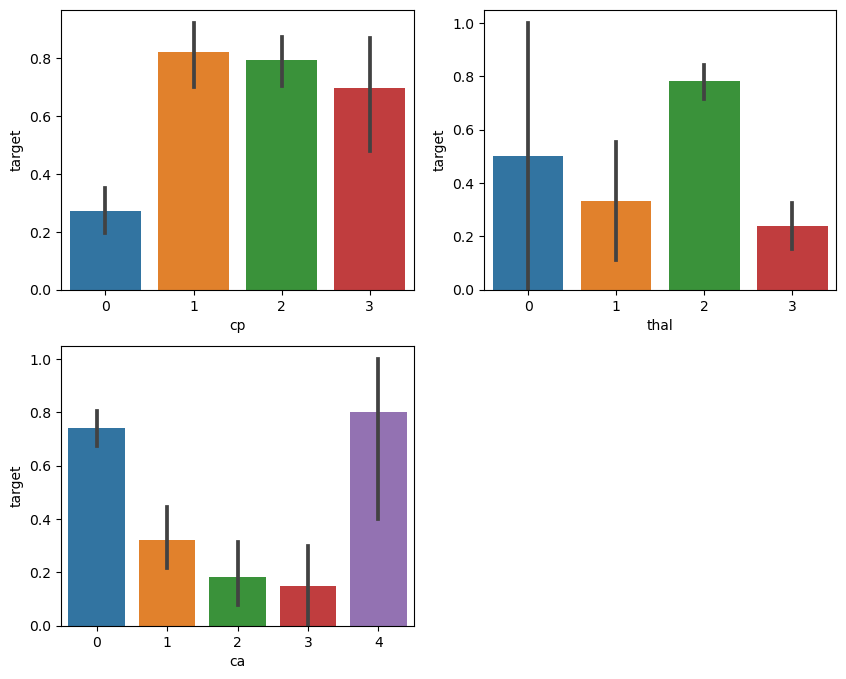

In [26]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.barplot(x = 'cp' , y = 'target' , data = df)
plt.xlabel('cp')
plt.ylabel('target')

plt.subplot(2,2,2)
sns.barplot(x = 'thal' , y = 'target' , data = df)
plt.xlabel('thal')
plt.ylabel('target')

plt.subplot(2,2,3)
sns.barplot(x = 'ca' , y = 'target' , data = df)
plt.xlabel('ca')
plt.ylabel('target')


plt.show()


Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
classifier = RandomForestClassifier()

In [29]:
parameter = {
    'n_estimators' : [100,200,300],
    'max_depth' : [3,4,5,6,7],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2,3]
    
}

In [30]:
clf = GridSearchCV(classifier , param_grid=parameter , cv = 5 , scoring='accuracy' , refit=True)

In [ ]:
clf.fit(X_train,y_train)

In [35]:
clf.best_score_

0.8534883720930232

In [36]:
clf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [37]:
classifier = RandomForestClassifier(n_estimators=100 , max_depth=5 , min_samples_leaf=3 , min_samples_split=2 )

In [38]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3)

In [39]:
y_pred_cv = classifier.predict(X_test)
y_pred_cv

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1])

In [40]:
cv_mat = confusion_matrix(y_test,y_pred_cv)
cv_mat

array([[33,  8],
       [ 7, 43]])

In [41]:
accuracy_cv = accuracy_score(y_test,y_pred_cv)

In [42]:
accuracy_cv

0.8351648351648352

In [43]:
t_pos_cv = cv_mat[0][0]
f_pos_cv = cv_mat[0][1]
f_neg_cv = cv_mat[1][0]
t_neg_cv = cv_mat[1][1]

In [44]:
precision_cv = t_pos_cv / (t_pos_cv + f_pos_cv)
precision_cv

0.8048780487804879

In [45]:
recall_cv = t_pos_cv/ (t_pos_cv + f_neg_cv)
recall_cv  # important

0.825

In [46]:
f1_score_cv = 2 * precision_cv * recall_cv / (precision_cv + recall_cv)
f1_score_cv

0.8148148148148149

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

Best pararmeters are :n_estimators=100 , max_depth=4 , min_samples_leaf=2 , min_samples_split=4

accuracy of the model before tuning is about 80 %
after tuning it becomes around 84%

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [47]:
from sklearn.inspection import DecisionBoundaryDisplay 

In [55]:
X_imp = X[['oldpeak','ca']]
X_imp.head()

,oldpeak,ca
0,2.3,0
1,3.5,0
2,1.4,0
3,0.8,0
4,0.6,0


In [56]:
top_classifier = RandomForestClassifier(n_estimators=100 , max_depth=5 , min_samples_leaf=3 , min_samples_split=2)

In [57]:
top_classifier.fit(X_imp ,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=3)

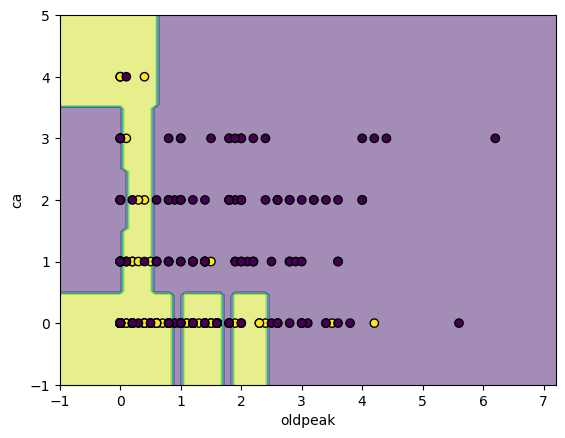

In [59]:
disp = DecisionBoundaryDisplay.from_estimator(top_classifier ,X_imp , response_method='predict' , alpha=0.5 )
disp.ax_.scatter(X_imp.iloc[:,0] , X_imp.iloc[:,1], c=y, edgecolor="k")
plt.show()

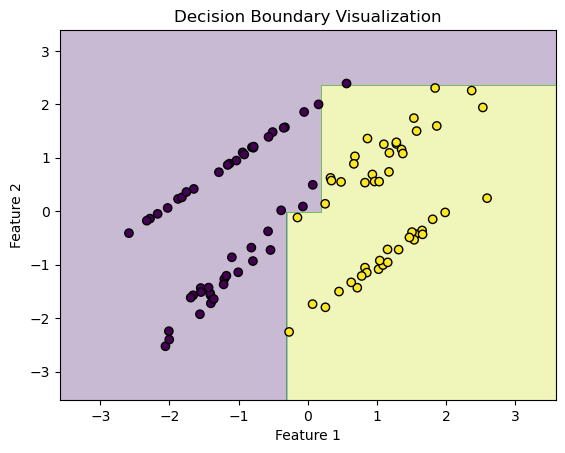

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary Visualization')
plt.show()